In [4]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
from astropy.io import fits as fits
from astropy.stats import sigma_clip
import lightkurve as lk
from lightkurve import SFFCorrector
from lightkurve import search_tesscut
import astropy.units as u
from astropy import stats
#import time as datetime
from lightkurve import periodogram
from astropy.convolution import Box1DKernel, convolve
from tqdm import tqdm_notebook as tqdm
import numpy.linalg as lin
import scipy.linalg as sclin
from scipy import stats as st
import pandas as pd
from lightkurve import search_targetpixelfile
from scipy import ndimage as nd
import re
#plt.rcParams.update({'figure.max_open_warning': 0})
#import warnings
#warnings.filterwarnings("ignore")

#Specific packages for Eleanor pipeline
from IPython.display import Image
import eleanor
from astropy import units as u
from astropy.coordinates import SkyCoord

In [5]:
cd /Users/hamil/Documents/TESSFiles 

C:\Users\hamil\Documents\TESSFiles


In [6]:
cand1 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031273263-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand2 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031273263-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand3 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031928890-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand4 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031928890-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand5 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031963492-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand6 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00031963492-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand7 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033734375-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand8 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033734375-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand9 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00231833061-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand10 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00231833061-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand11 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00260504147-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand12 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00260504147-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand13 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00370324073-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand14 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00425906447-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand15 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00425906447-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand16 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033767523-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand17 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00033767523-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand18 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179371765-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand19 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179371765-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand20 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00179985566-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand21 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00270411008-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')
cand22 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00271975434-s01-c1800-dr01-v04-tasoc_lc.fits.gz', 'rb')
cand23 = gzip.open('/Users/hamil/Documents/TESSFiles/tess00271975434-s02-c1800-dr02-v04-tasoc_lc.fits.gz', 'rb')

Filename: /Users/hamil/Documents/TESSFiles/tess00031273263-s01-c1800-dr01-v04-tasoc_lc.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      47   ()      
  1  LIGHTCURVE    1 BinTableHDU     88   1282R x 14C   [D, E, J, D, D, D, D, D, J, J, D, D, D, D]   
  2  SUMIMAGE      1 ImageHDU        87   (15, 15)   float64   
  3  APERTURE      1 ImageHDU        87   (15, 15)   int32   


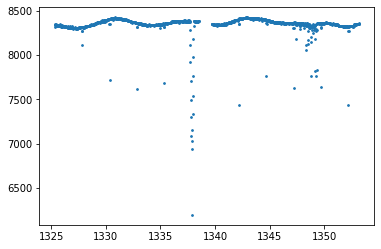

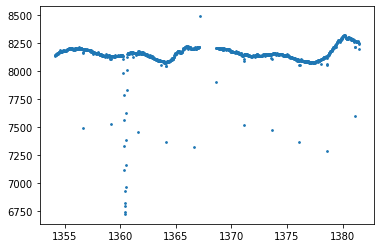

In [7]:
hdul1 = fits.open(cand1)

hdul1.info()
hdul1[0].header
hdul1[2].header
dataset = hdul1[1].data
flux1 = dataset['FLUX_RAW']
flux1_err = dataset['FLUX_RAW_ERR']
fluxbkg = dataset['FLUX_BKG']
time1 = dataset['TIME']
sect = hdul1[0].header['SECTOR']
camera = hdul1[0].header['CAMERA']
CCD = hdul1[0].header['CCD']
aperture = hdul1[3].data
quad = dataset['QUALITY']
pix_quad = dataset['PIXEL_QUALITY']
cado = dataset['CADENCENO']
cent1 = dataset['MOM_CENTR1']
cent2 = dataset['MOM_CENTR2']
plt.scatter(time1,flux1, s=3)
plt.show()


hdul2 = fits.open(cand2)
dataset = hdul2[1].data
flux2 = dataset['FLUX_RAW']
flux2_err = dataset['FLUX_RAW_ERR']
fluxbkg2 = dataset['FLUX_BKG']
time2 = dataset['TIME']
sect = hdul2[0].header['SECTOR']
camera = hdul2[0].header['CAMERA']
CCD = hdul2[0].header['CCD']
aperture2 = hdul2[3].data
quad2 = dataset['QUALITY']
pix_quad2 = dataset['PIXEL_QUALITY']
cado2 = dataset['CADENCENO']
cent12 = dataset['MOM_CENTR1']
cent22 = dataset['MOM_CENTR2']


plt.scatter(time2,flux2, s=3)
plt.show()

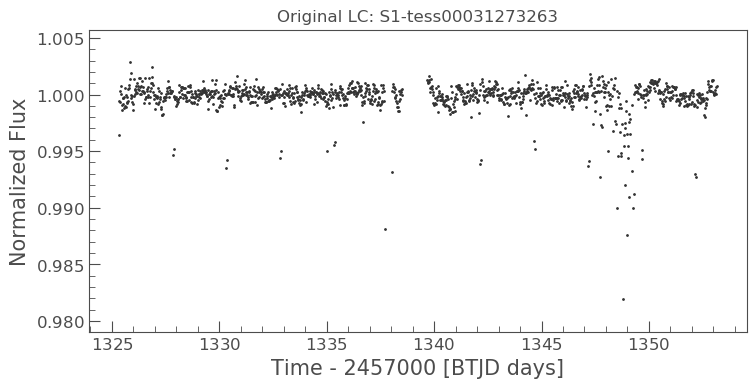

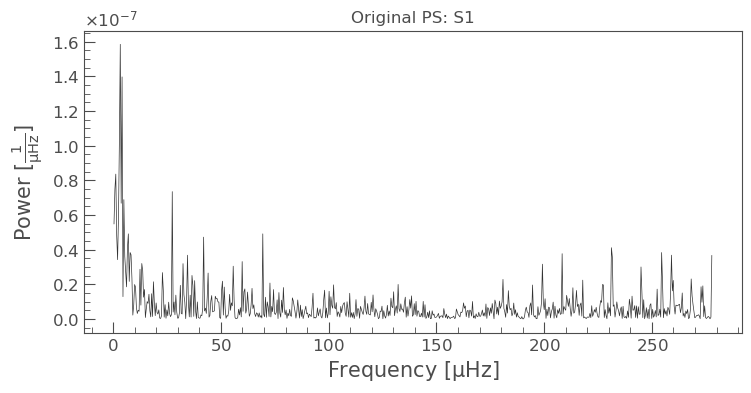

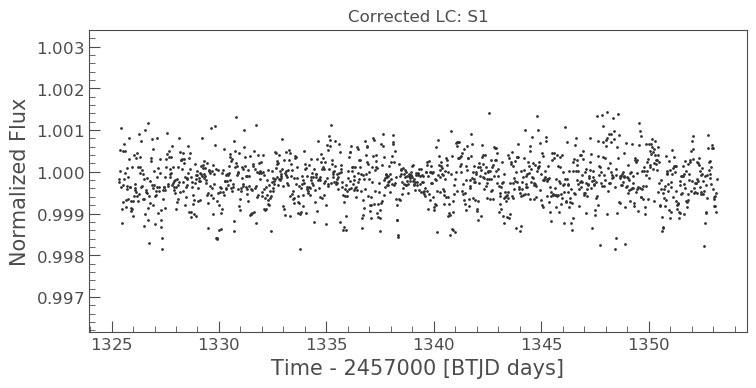

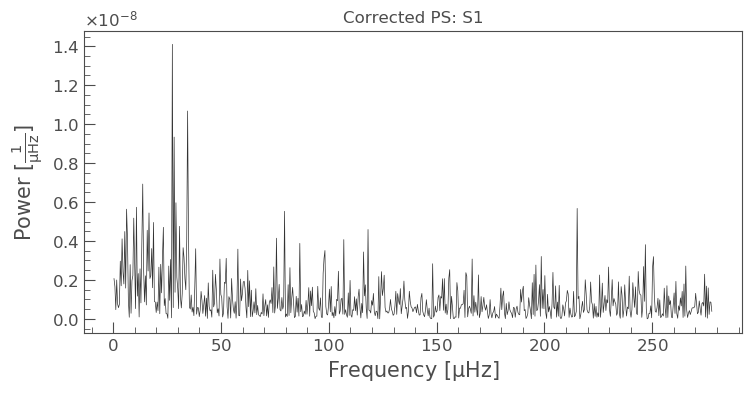

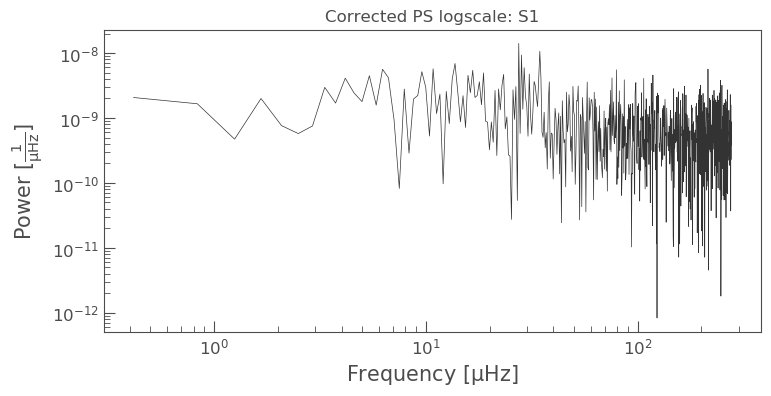

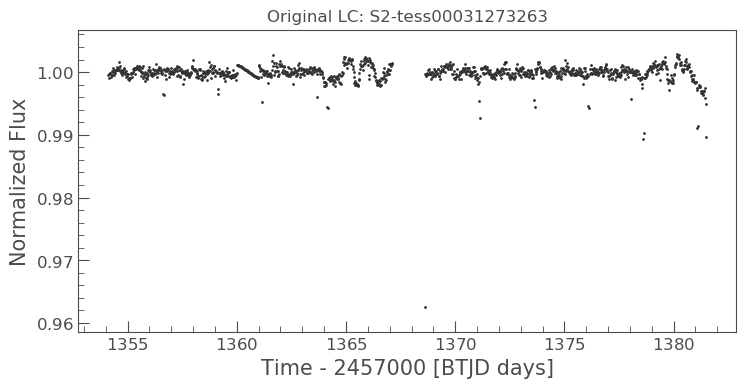

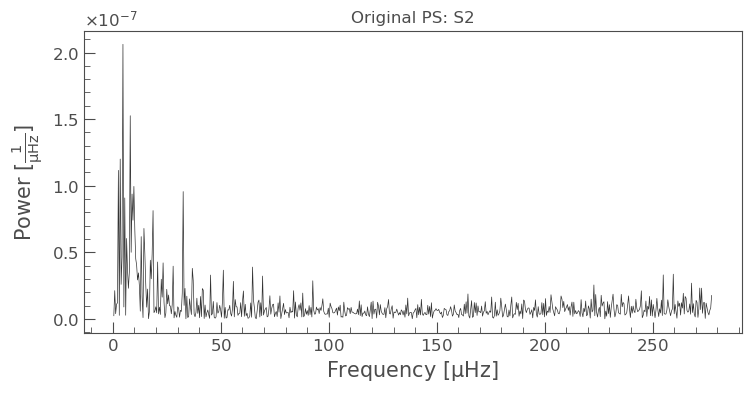

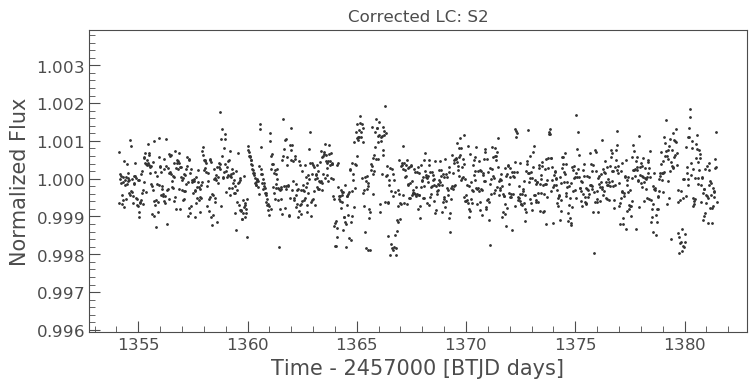

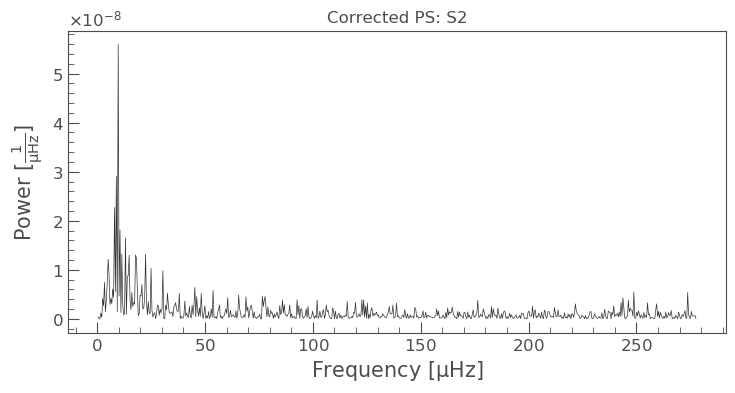

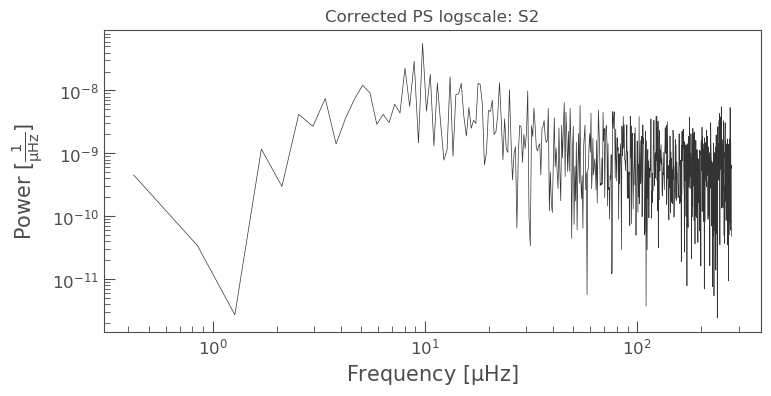

Text(0.5, 1.0, 'Combined Power Logged')

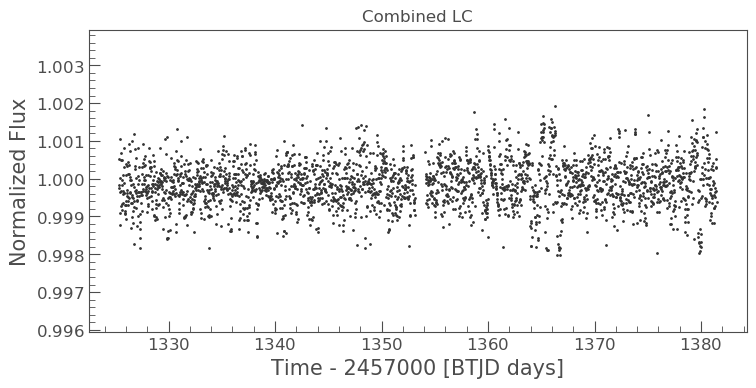

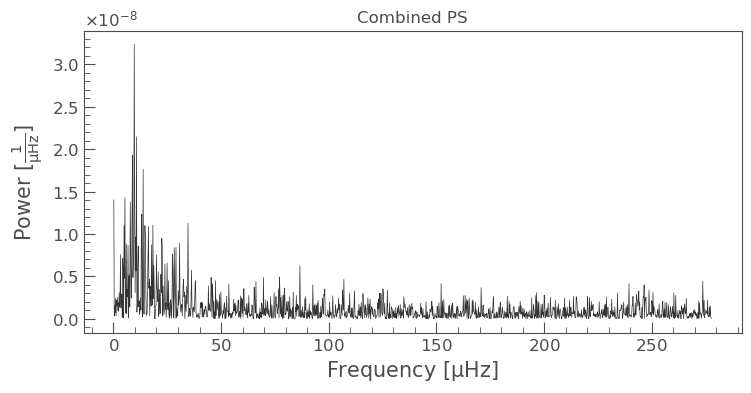

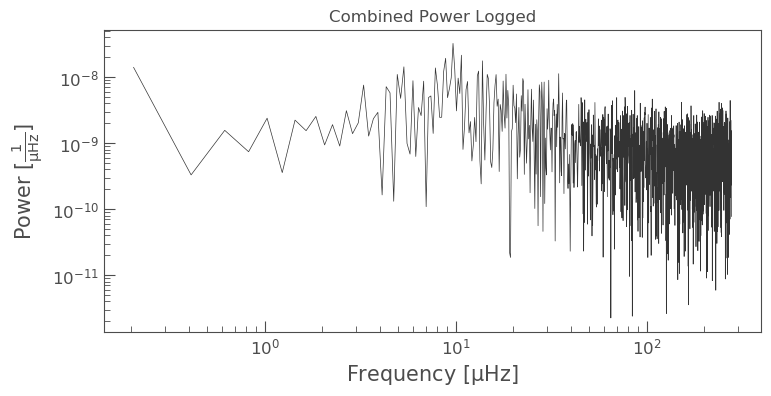

In [8]:
#SECTOR 1
#Cut eclipse and large systematic errors
condition = ((time1 > 1347) & (time1 < 1350) & (time1 > 1337.5) & (time1 < 1338.5))
flux1[condition] = np.median(flux1)

#create lightcurve, periodogram, power spectrum and plot all
model1 = lk.TessLightCurve(time1,flux1,centroid_col = cent2, centroid_row = cent1, cadenceno= cado).remove_nans().normalize().remove_outliers().flatten(window_length=145)
model1.scatter()
plt.title('Original LC: S1-tess00031273263')
plt.show()
power1 = model1.to_periodogram(method='lombscargle', normalization="psd")
power1.plot()
plt.title('Original PS: S1')
plt.show()

#Correct model using SFF and plot, then redo the periodogram, power spectrum and plot all
corrected_lc1 = model1.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc1.scatter()
plt.title('Corrected LC: S1')
corr_power1 =corrected_lc1.to_periodogram(method='lombscargle', normalization="psd")
corr_power1.plot()
plt.title('Corrected PS: S1')
plt.show()
corr_power1.plot(scale = 'log')
plt.title('Corrected PS logscale: S1')
plt.show()



#SECTOR 2
#cut eclipse and large systematic errors if needed
conditions = ((time2 > 1360) & (time2 < 1361))
flux2[conditions] = np.median(flux2)

#create lightcurve, periodogram, power spectrum and plot all
model2 = lk.TessLightCurve(time2,flux2, centroid_col = cent22, centroid_row = cent12, cadenceno= cado2).remove_nans().normalize().remove_outliers().flatten(window_length=145)
model2.scatter()
plt.title('Original LC: S2-tess00031273263')
plt.show()
power2 = model2.to_periodogram(method='lombscargle', normalization="psd")
power2.plot()
plt.title('Original PS: S2')
plt.show()


#Correct model using SFF and plot, then redo the periodogram, power spectrum and plot all
corrected_lc2 = model2.to_corrector("sff").correct(windows=10).remove_outliers(sigma_lower=3, sigma_upper=3).fill_gaps()
corrected_lc2.scatter()
plt.title('Corrected LC: S2')
corr_power2 =corrected_lc2.to_periodogram(method='lombscargle', normalization="psd")
corr_power2.plot()
plt.title('Corrected PS: S2')
plt.show()
corr_power2.plot(scale = 'log')
plt.title('Corrected PS logscale: S2')
plt.show()



#Combine both corrected lightcurves to see potential oscillations
combined = corrected_lc1.append(corrected_lc2)
#combined = combined.fold(period=27)
combined.scatter()
plt.title('Combined LC')
combined_power = combined.to_periodogram(method='lombscargle', normalization="psd")
combined_power.plot()
plt.title('Combined PS')
combined_power.plot(scale='log')
plt.title('Combined Power Logged')





In [10]:
corr_flux = eleanor.TargetData.corrected_flux(model1, flux=model1.flux)
plt.scatter(model1.time, corr_flux, s='3')

AttributeError: 'TessLightCurve' object has no attribute 'flux_bkg'